In [ ]:
#A small firm is available for purchase at an initial cost of $150,000, to

#be paid to the current owner in equal installments over the next five

#years. The firm has been generating annual revenues of $100,000.

#Operating costs are 65 percent of revenues. For tax purposes, the

#firm’s earnings would appear on your personal income tax return, and

#the applicable tax rate would be 36 percent. Your investment would

#be deductible when calculating taxes. Under these assumptions, the

#NPV (at a discount rate of 10 percent) for this 5-year project is

#$12,131.

# NPV Cash Flow Simulation

In [5]:
# need to run the following command only once to install the package
!pip install numpy-financial

In [1]:
import random as rd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf

In [3]:
#input parameters
total_invest = 150000
years = 5
disc_rate = 0.10
revenue_min = 60000
revenue_max = 125000
revenue_mode = 100000
cost_perc_min = 0.55
cost_perc_max = 0.75
tax_rates = [0.36, 0.40]
tax_rates_weight = [0.4, 0.6]

In [4]:
# simulation trials
trials = 1000
sample_npv = list()
sample_mincashflow = list()
for i in range(trials):
    cash_flow = [0]
    for t in range(years):
        invest = total_invest / years
        revenue = rd.triangular(revenue_min, revenue_max, revenue_mode)
        cost_perc = rd.uniform(cost_perc_min, cost_perc_max)
        cost = revenue * cost_perc
        profit = revenue - cost
        tax_income = profit - invest
        tax_rate = rd.choices(tax_rates, tax_rates_weight)[0]
        tax = tax_rate * tax_income
        cash_flow.append(tax_income - tax)
        
    npv = npf.npv(disc_rate, cash_flow)
    sample_npv.append(npv)
    sample_mincashflow.append(min(cash_flow))
        

(array([ 12.,  45., 140., 219., 229., 184., 111.,  43.,  16.,   1.]),
 array([-13803.80118103,  -8899.25957651,  -3994.71797198,    909.82363254,
          5814.36523706,  10718.90684158,  15623.44844611,  20527.99005063,
         25432.53165515,  30337.07325968,  35241.6148642 ]),
 <BarContainer object of 10 artists>)

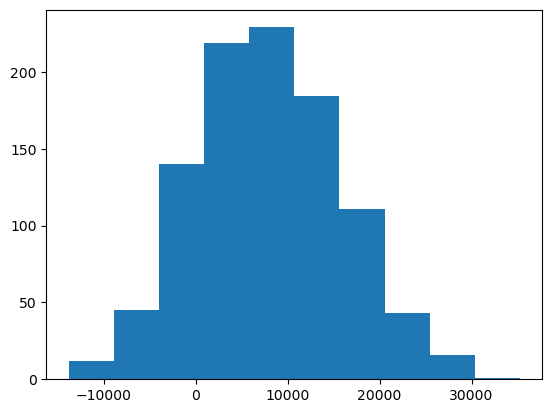

In [5]:
plt.hist(sample_npv)

In [9]:
print('Mean NPV = $%5.2f' % st.mean(sample_npv))

Mean NPV = $7913.19


In [11]:
proportion = sum(1 for x in sample_npv if x < 0.0) / len(sample_npv)
print('There is a %5.2f%% chance the NPV is negative' % (100*proportion))

There is a 16.10% chance the NPV is negative


In [13]:
proportion = sum(1 for x in sample_mincashflow if x >= 0.0) / len(sample_mincashflow)
print('There is a %4.2f%% chance the cash flows are positive in all five years.' % (100*proportion))

There is a 12.50% chance the cash flows are positive in all five years.


## Confidence Intervals

In [16]:
# 90% confidence interval for true NPV mean
sample_mean = st.mean(sample_npv)
sample_std = st.stdev(sample_npv)
moe = 1.645 * sample_std /len(sample_npv)**0.5

lcl = sample_mean - moe
ucl = sample_mean + moe

print('90%% percent confidence interval for the mean NPV is (%6.1f, %6.1f)' % (lcl, ucl))

90% percent confidence interval for the mean NPV is (7504.2, 8322.2)


In [18]:
# 5th and 95th percentiles of the NPV sample
print('The 5th percentile of sample is %8.2f' % np.percentile(sample_npv, 5))
print('The 95th percentile of sample is %8.2f' % np.percentile(sample_npv, 95))

The 5th percentile of sample is -4433.41
The 95th percentile of sample is 21433.07


In [20]:
# 95% confidence interval for the true probability all cash flows are positive


print('95%% percent confidence interval for the true probability all cash flows are positive is (%6.4f, %6.4f).' % (lcl, ucl))

95% percent confidence interval for the true probability all cash flows are positive is (7504.1569, 8322.2141).


In [22]:
p = sum(1 for x in sample_mincashflow if x >= 0.0) / len(sample_mincashflow)
moe = 1.96 * (p*(1-p)/len(sample_mincashflow))**0.5
lcl = p -moe
ucl = p +moe

print('95%% confidence int for the true prob all cash flows are pos is (%6.4f, %6.4f).' % (lcl, ucl))

95% confidence int for the true prob all cash flows are pos is (0.1045, 0.1455).
